In [34]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [36]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [37]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [38]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [39]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [40]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [41]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9362a0db5ea52ce7cb4bc15e6f61c42d


In [42]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [43]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [44]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1.
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | yellowknife
Processing Record 2.0 of Set 1 | mataura
Processing Record 3.0 of Set 1 | punta arenas
Processing Record 4.0 of Set 1 | ojinaga
Processing Record 5.0 of Set 1 | carnarvon
Processing Record 6.0 of Set 1 | kodiak
Processing Record 7.0 of Set 1 | troina
Processing Record 8.0 of Set 1 | kaeo
Processing Record 9.0 of Set 1 | hilo
Processing Record 10.0 of Set 1 | hithadhoo
Processing Record 11.0 of Set 1 | saldanha
Processing Record 12.0 of Set 1 | karasburg
Processing Record 13.0 of Set 1 | talnakh
Processing Record 14.0 of Set 1 | bluff
Processing Record 15.0 of Set 1 | kamien pomorski
Processing Record 16.0 of Set 1 | tokonou
Processing Record 17.0 of Set 1 | chokurdakh
Processing Record 18.0 of Set 1 | rikitea
Processing Record 19.0 of Set 1 | port hardy
Processing Record 20.0 of Set 1 | cabo san lucas
Processing Record 21.0 of Set 1 | saint george
Processing Record 22.0 of Set 1 | strezhevoy
Processing Record 23.0 of Set 1 | ushuaia
Processing

City not found. Skipping...
Processing Record 33.0 of Set 4 | thongwa
Processing Record 34.0 of Set 4 | watertown
Processing Record 35.0 of Set 4 | galesburg
Processing Record 36.0 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 37.0 of Set 4 | zhukovo
Processing Record 38.0 of Set 4 | vanderhoof
Processing Record 39.0 of Set 4 | riyadh
Processing Record 40.0 of Set 4 | miles city
Processing Record 41.0 of Set 4 | nuuk
Processing Record 42.0 of Set 4 | broome
Processing Record 43.0 of Set 4 | warmbad
Processing Record 44.0 of Set 4 | chifeng
Processing Record 45.0 of Set 4 | tasiilaq
Processing Record 46.0 of Set 4 | sembe
Processing Record 47.0 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48.0 of Set 4 | samarai
Processing Record 49.0 of Set 4 | kayerkan
Processing Record 50.0 of Set 4 | kiunga
Processing Record 1 of Set 5 | labuhan
Processing Record 2.0 of Set 5 | sao jose da coroa grande
Processing Record 3.0 of Set 5 | victor harbor
Pro

Processing Record 13.0 of Set 8 | natal
Processing Record 14.0 of Set 8 | ust-ishim
Processing Record 15.0 of Set 8 | marand
Processing Record 16.0 of Set 8 | salisbury
Processing Record 17.0 of Set 8 | cap malheureux
Processing Record 18.0 of Set 8 | hofn
Processing Record 19.0 of Set 8 | katsiveli
City not found. Skipping...
Processing Record 20.0 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 21.0 of Set 8 | burnie
Processing Record 22.0 of Set 8 | ola
Processing Record 23.0 of Set 8 | rantepao
Processing Record 24.0 of Set 8 | santa isabel do rio negro
Processing Record 25.0 of Set 8 | qaqortoq
Processing Record 26.0 of Set 8 | bilma
Processing Record 27.0 of Set 8 | liuhe
Processing Record 28.0 of Set 8 | juchipila
Processing Record 29.0 of Set 8 | korla
Processing Record 30.0 of Set 8 | clacton-on-sea
Processing Record 31.0 of Set 8 | chapais
Processing Record 32.0 of Set 8 | provideniya
Processing Record 33.0 of Set 8 | donji komren
City not found. Skipping...

Processing Record 42.0 of Set 11 | ulladulla
Processing Record 43.0 of Set 11 | rognan
Processing Record 44.0 of Set 11 | santa marta
Processing Record 45.0 of Set 11 | williams lake
Processing Record 46.0 of Set 11 | przeworsk
Processing Record 47.0 of Set 11 | guerrero negro
Processing Record 48.0 of Set 11 | ternate
Processing Record 49.0 of Set 11 | lushunkou
City not found. Skipping...
Processing Record 50.0 of Set 11 | bocas del toro
Processing Record 1 of Set 12 | camocim
Processing Record 2.0 of Set 12 | lahaina
Processing Record 3.0 of Set 12 | marmaris
Processing Record 4.0 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 5.0 of Set 12 | dingle
Processing Record 6.0 of Set 12 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 7.0 of Set 12 | iracoubo
Processing Record 8.0 of Set 12 | hinesville
Processing Record 9.0 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 10.0 of Set 12 | rudbar
Processing Record 11.0 of Set 12 

In [45]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [47]:
city_data_df.head(30)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,46.42,80,75,4.00,CA,2021-09-25 23:25:20
1,Mataura,-46.1927,168.8643,46.47,90,47,6.80,NZ,2021-09-25 23:25:20
2,Punta Arenas,-53.1500,-70.9167,41.11,70,40,18.41,CL,2021-09-25 23:21:12
3,Ojinaga,29.5667,-104.4167,92.41,22,1,17.27,MX,2021-09-25 23:25:21
4,Carnarvon,-24.8667,113.6333,68.07,68,40,10.36,AU,2021-09-25 23:25:22
5,Kodiak,57.7900,-152.4072,45.91,53,75,6.91,US,2021-09-25 23:25:22
6,Troina,37.7854,14.5985,64.36,87,24,0.34,IT,2021-09-25 23:25:22
7,Kaeo,-35.1000,173.7833,64.33,86,38,7.29,NZ,2021-09-25 23:25:23
8,Hilo,19.7297,-155.0900,83.93,76,20,14.97,US,2021-09-25 23:25:23
9,Hithadhoo,-0.6000,73.0833,81.72,77,100,16.51,MV,2021-09-25 23:21:15


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [49]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1632625460.4302468

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

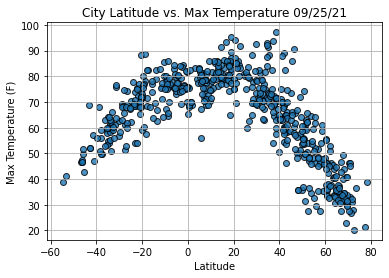

In [52]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

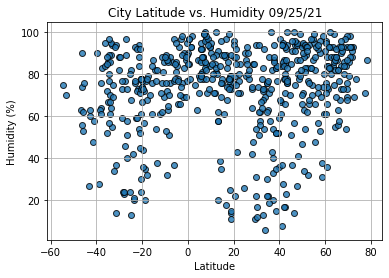

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()